# Reduction 2020 - 2023

Apziva project #4<br>
2023 09 04

__Summary:__
* In the meeting of 20 Sep 2023, SSM and I decided to limit the microsoft dataset to the years 2020 to 2023:
    * 2020 to 2022: training.
    * 2023: testing.
* Within this now relatively short time series, the prices do not increase by orders of magnitude.
    * Thus, working on logarithms is not necessary.
    * Instead, raw price data is used.

## TOC: <a class="anchor" id="TOC"></a>
* [Utilities](#Utilities)
* [Installation](#Installation)
* [Loading data](#LoadingData)
* [Scattergram](#Scattergram)
* [Differencing on absolute price data](#DifferencingAbsolutePriceData)

## Utilities <a class="anchor" id="Utilities"></a>
[TOC](#TOC)

In [1]:
# own libraries
import Utilities as u
import MachineLearning as ml

# activate changes in libraries
import importlib
importlib.reload(u)
importlib.reload(ml)

# aliases
from Utilities import TypeChecker as t
from Utilities import PrintAlias as p

## Installation <a class="anchor" id="Installation"></a>
[TOC](#TOC)

In [2]:
# installationb
# pip install gradio

## Loading data <a class="anchor" id="LoadingData"></a>
[TOC](#TOC)

In [3]:
import pickle
import pandas as pd
strFilename = f"../data/processed/dfrDifferencing.p"
with open(strFilename, 'rb') as objBufferedWriter: # rb = read in binary mode
    dfrDifferencing = pickle.load(objBufferedWriter)
p("Dataframe dfrDifferencing is used here:")
p("(+) Gaps already filled.")
p("(-) Original absolute price values will have to be restored.")
p()
u.ShortDataFrameDisplay(dfrDifferencing)

Dataframe dfrDifferencing is used here:
(+) Gaps already filled.
(-) Original absolute price values will have to be restored.

DataFrame 'dfrDifferencing':


,Date,LogPrice,DiffLogPrice
0,1986-03-13,-1.238822,0.000000
1,1986-03-14,-1.211302,0.027520
...,...,...,...
13690,2023-09-05,2.520189,0.000424
13691,2023-09-06,2.522614,0.002425


In [4]:
dfrThreeYears = dfrDifferencing.copy()
dfrThreeYears = dfrThreeYears[dfrThreeYears['Date'] >= '2020-01-01']
dfrThreeYears["Price"] = 10 ** dfrThreeYears["LogPrice"] 
u.ShortDataFrameDisplay(dfrThreeYears)

DataFrame 'dfrThreeYears':


,Date,LogPrice,DiffLogPrice,Price
12347,2020-01-01,2.184722,0.003378,153.010615
12348,2020-01-02,2.188099,0.003378,154.205344
...,...,...,...,...
13690,2023-09-05,2.520189,0.000424,331.274994
13691,2023-09-06,2.522614,0.002425,333.130005


In [5]:
dfrThreeYears = dfrThreeYears[["Date","Price"]]
u.ShortDataFrameDisplay(dfrThreeYears)

DataFrame 'dfrThreeYears':


,Date,Price
12347,2020-01-01,153.010615
12348,2020-01-02,154.205344
...,...,...
13690,2023-09-05,331.274994
13691,2023-09-06,333.130005


__Comment__
* The time series covers now __3 years and 9 months only__, rather than 27 years.

## Scattergram <a class="anchor" id="Scattergram"></a>
[TOC](#TOC)

MICROSOFT STOCK MARKET PRICES 2020 TO 2023
- The red line separates training data from test data.


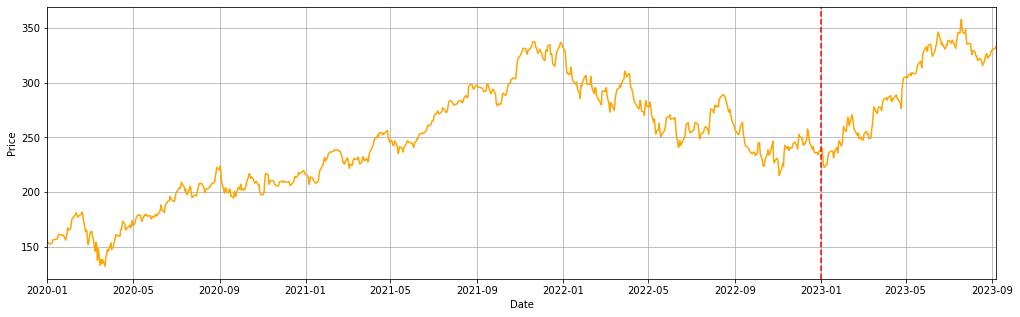

In [6]:
import matplotlib.pyplot as plt

def PlotTimeSeries(strColumn):
    '''
    Plots time series, separating training and test phase using a red line.
    When       Who What
    2023 09 21 dh  Created
    '''
    # scatter plot
    plt.figure(figsize=(17, 5))
    plt.plot(dfrThreeYears['Date'], dfrThreeYears[strColumn], color='orange', marker='', linestyle='-')

    # time range (timestamps)
    tstFirstDate = dfrThreeYears['Date'].min()
    tstLastDate = dfrThreeYears['Date'].max()

    # customize plot
    plt.xlim(tstFirstDate, tstLastDate)
    plt.grid(True)
    plt.xlabel('Date')
    plt.ylabel(strColumn)

    # separator for training/test data
    red_line_date = pd.to_datetime('2023-01-01')
    plt.axvline(x=red_line_date, color='red', linestyle='--')

    # finalize
    p("Microsoft stock market prices 2020 to 2023".upper())
    p("- The red line separates training data from test data.")
    plt.show()
    
PlotTimeSeries('Price')    

__Comments__
* The time series is __not a constant time series__ with noise.
* There seems to be a __positive linear__ trend with strong noise.
* There is no obvious seasonality.

## Differencing on absolute price data <a class="anchor" id="DifferencingAbsolutePriceData"></a>
[TOC](#TOC)

DataFrame 'dfrThreeYears':


,Date,Price,Differences
12347,2020-01-01,153.010615,0.000000
12348,2020-01-02,154.205344,1.194729
...,...,...,...
13690,2023-09-05,331.274994,0.322970
13691,2023-09-06,333.130005,1.855011


MICROSOFT STOCK MARKET PRICES 2020 TO 2023
- The red line separates training data from test data.


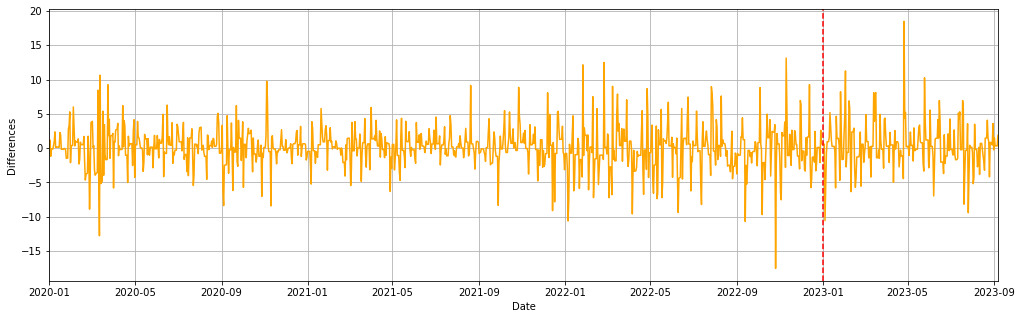

,count,mean,std,min,25%,50%,75%,max
Differences,1345.0,0.133918,2.901551,-17.545486,-1.048396,0.164926,1.330851,18.490309


In [11]:
# differencing
dfrThreeYears['Differences'] = dfrThreeYears['Price'].diff().fillna(0)
u.ToDisk(dfrThreeYears,strForcedName="dfrThreeYears",strType="processed")
u.ShortDataFrameDisplay(dfrThreeYears)

# plot and describe
PlotTimeSeries('Differences')    
dfrThreeYears[["Differences"]].describe().T

__Comments__
* Both mean and median are small positive numbers.
    * That is, there is a __general upward trend__.
* The standard deviation and also the interquartile range are comparatively large, compared to mean and median.
    * That is, the __upward trend is not very clear__.
* These observations include the test dataset.
    * For the __dummy prediction__, the mean will be calculated __only on the training dataset__.